In [1]:
import random
import numpy as np


In [2]:
d = True

config = {
    "dimensions": (8, 8), 
    "generations": 25,
    "goodwill": True,
    "goodwillity": 0.2,
    "anger": True,
    "defiancebreaker": True
}


tft_defect = 0

strategiesmem1 = {
    ## start, CC, CD, DC, DD
    "tit-for-tat": [1, 1, tft_defect, 1, tft_defect]
}

strategiesreactive = {
    ## start, C, D
    "tit-for-tat": [1, 1, tft_defect]
}


In [3]:

def organism_response_matrix(env_matrix, position, strategy, anger=True, start=False, goodwill=False, goodwillity=0.5, defiancebreaker=False): ## forced at 2D only for now
    if anger:
        if start:
            return strategy[0]
        shape = env_matrix.shape
    #    cff = -1
    #    dimnoatperif = []
    #    for dimension in shape:
    ##        cff+=1
    #        if position[cff] == dimension-1 or position[cff] == 0:
    #            dimnoatperif.append()
        if d: print("angry")
        defiance = False
        y = position[0]
        x = position[1]
        loop_position = [-1,-1]
        defiant = 0
        cooperative = 0
        for row in env_matrix:
            loop_position[0] += 1
            loop_position[1] = -1
            for organism in row:
                loop_position[1] +=1
                if d: print("in function: ", loop_position, position)
                if loop_position[0] == y or loop_position[0] == y-1 or loop_position[0] == y+1:
                    if loop_position[1] == x or loop_position[1] == x-1 or loop_position[1] == x+1:
                        if d: print("adjacent")
                        if env_matrix[loop_position[0]][loop_position[1]] != 1:
                            if loop_position[0] == y and loop_position[1] == x:
                                if d: print("reached self")
                            else:
                                if goodwill:
                                    defiant+=1
                                else:
                                    defiance = True
                            if d: print("defiance")
                        else:
                            if goodwill:
                                cooperative+=1

        if defiancebreaker:
            if cooperative!=0:
                if goodwill and (defiant/(defiant+cooperative)) >= goodwillity :
                    if d: print("COOPERATIVE AND DEFIANT: ", cooperative, defiant)
                    defiance=True
        else:
            if goodwill and (defiant/(defiant+cooperative)) >= goodwillity :
                    if d: print("COOPERATIVE AND DEFIANT: ", cooperative, defiant)
                    defiance=True

        if defiance:
            return strategy[2]
        else:
            if d: print ("cooperation")
            return strategy[1]
        


In [4]:
#env_matrix = np.random.random(config["dimensions"])
#env_matrix = np.array([[1, 1, 1], [1, 1, 1], [1,1, 0]])
env_matrix = np.ones(config["dimensions"])
env_matrix[7][7] = 0
env_matrix[7][6] = 0
#env_matrix[6][7] = 0
print(env_matrix)


generational_matrix = []
generational_matrix.append(env_matrix)

current_env_matrix = env_matrix
next_env_matrix = []



for i in range(config["generations"]):
    position = [-1,-1]
    for row in current_env_matrix:
        position[0] += 1
        position[1] = -1
        rowmatrix = []
        for organism in row:
            position[1] += 1
            if d: print("in loop: ",position )
            rowmatrix.append(organism_response_matrix(current_env_matrix, position, strategiesreactive["tit-for-tat"], anger=config["anger"], goodwill=config["goodwill"], goodwillity=config["goodwillity"], defiancebreaker=config["defiancebreaker"]))
        
        next_env_matrix.append(rowmatrix)
    
    if d: print(np.array(next_env_matrix))
    current_env_matrix = np.array(next_env_matrix)
    generational_matrix.append(current_env_matrix)

    next_env_matrix = []


if d: print(generational_matrix)



[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 0.]]
in loop:  [0, 0]
angry
in function:  [0, 0] [0, 0]
adjacent
in function:  [0, 1] [0, 0]
adjacent
in function:  [0, 2] [0, 0]
in function:  [0, 3] [0, 0]
in function:  [0, 4] [0, 0]
in function:  [0, 5] [0, 0]
in function:  [0, 6] [0, 0]
in function:  [0, 7] [0, 0]
in function:  [1, 0] [0, 0]
adjacent
in function:  [1, 1] [0, 0]
adjacent
in function:  [1, 2] [0, 0]
in function:  [1, 3] [0, 0]
in function:  [1, 4] [0, 0]
in function:  [1, 5] [0, 0]
in function:  [1, 6] [0, 0]
in function:  [1, 7] [0, 0]
in function:  [2, 0] [0, 0]
in function:  [2, 1] [0, 0]
in function:  [2, 2] [0, 0]
in function:  [2, 3] [0, 0]
in function:  [2, 4] [0, 0]
in function:  [2, 5] [0, 0]
in function:  [2, 6] [0, 0]
in function:  [2, 7] [0, 0]
in function:  [3, 0] [0, 0]
in function:  [3, 1] [0,

C:\Users\tavi\AppData\Local\Temp\ipykernel_34872\798802300.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


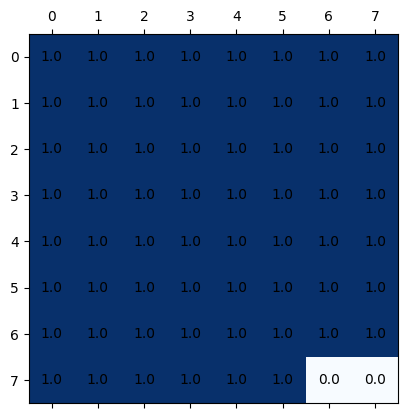

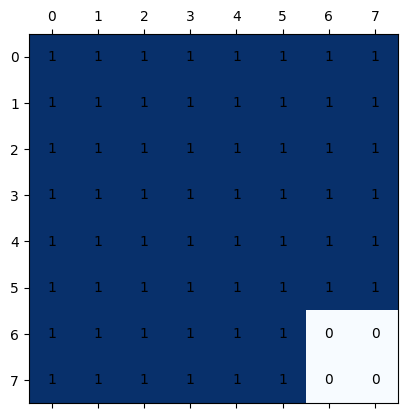

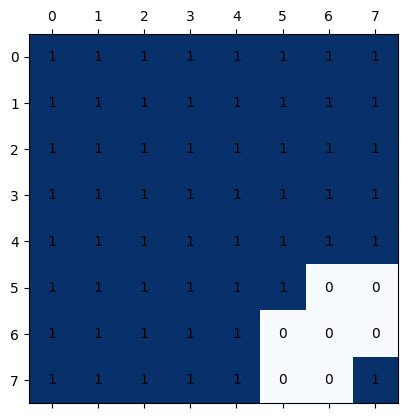

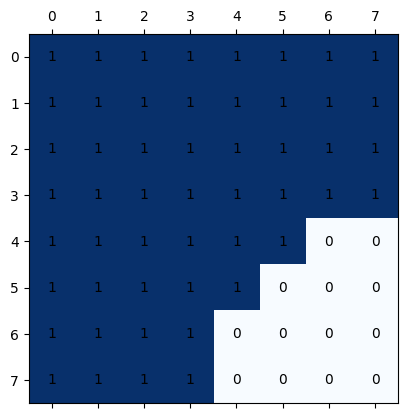

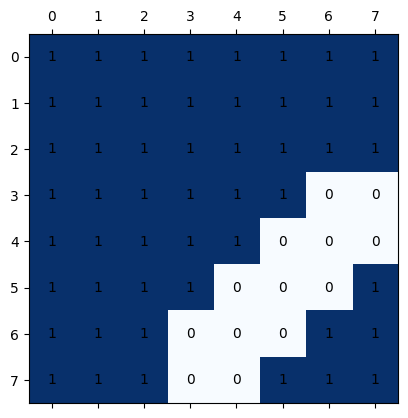

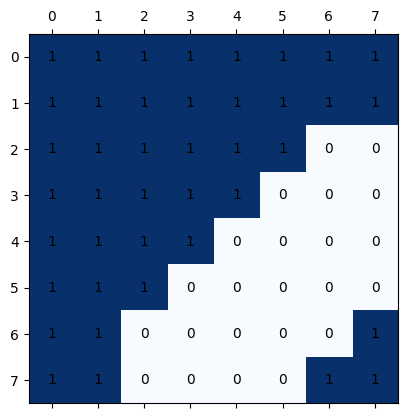

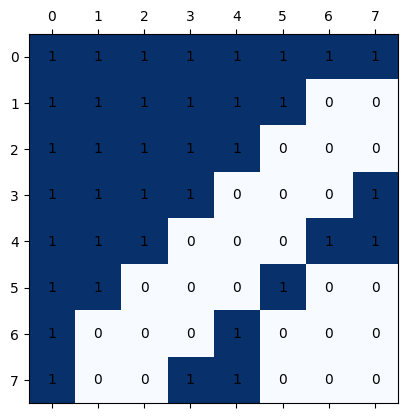

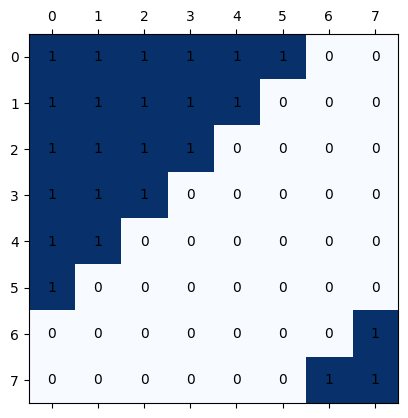

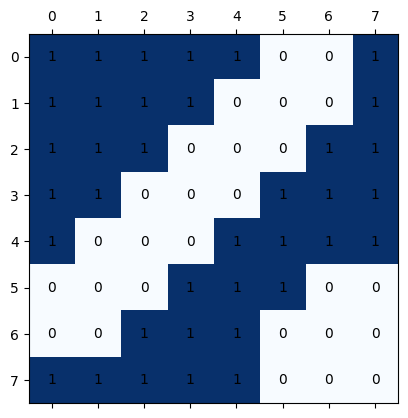

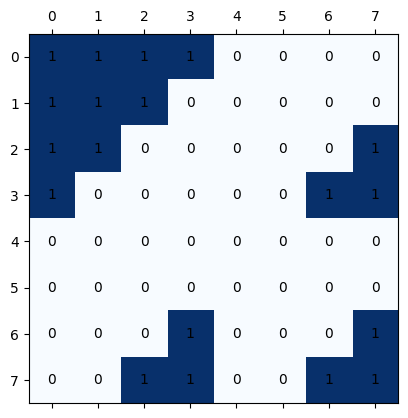

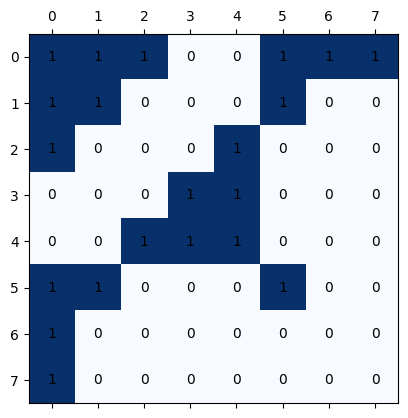

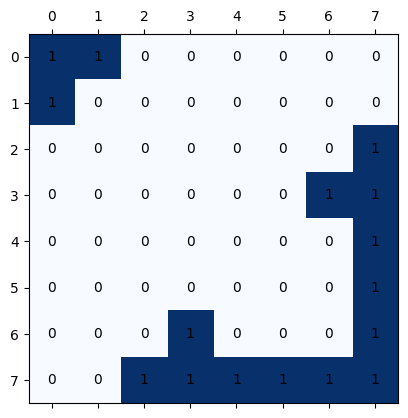

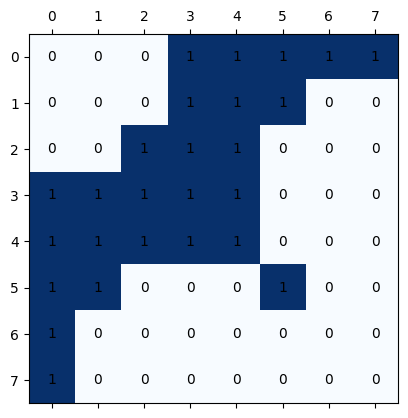

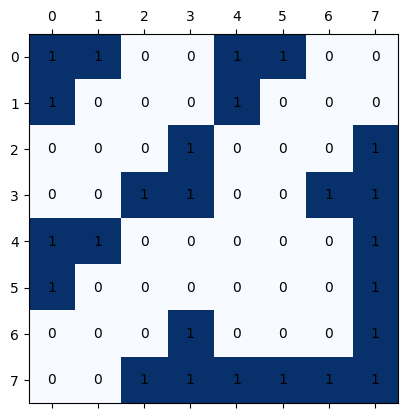

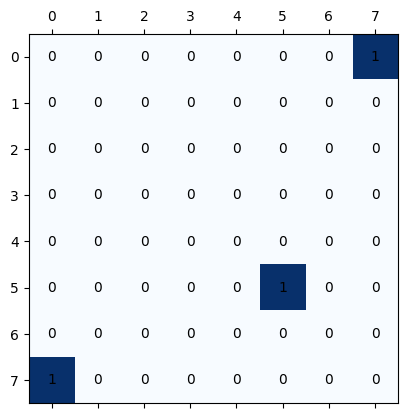

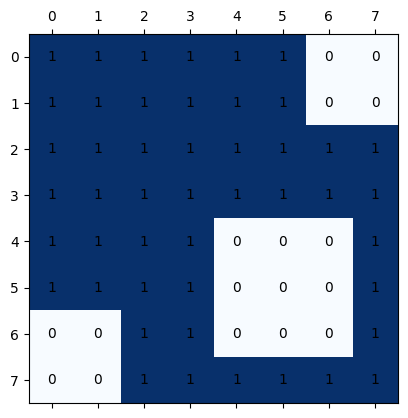

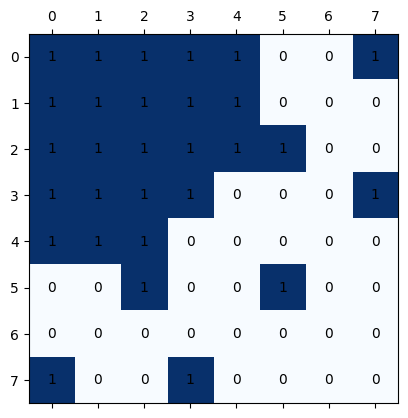

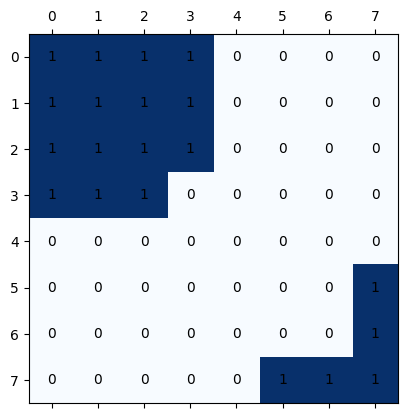

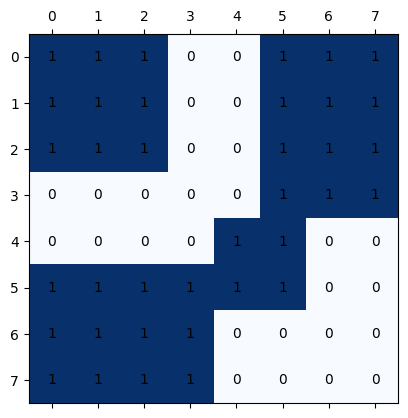

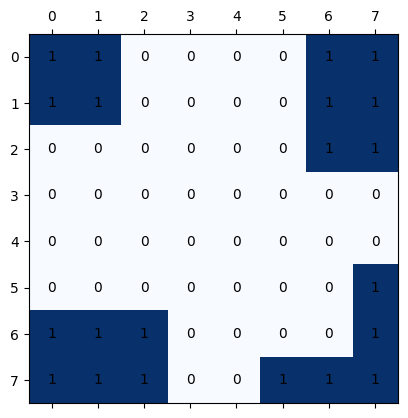

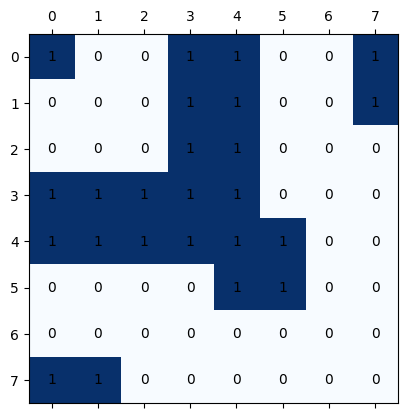

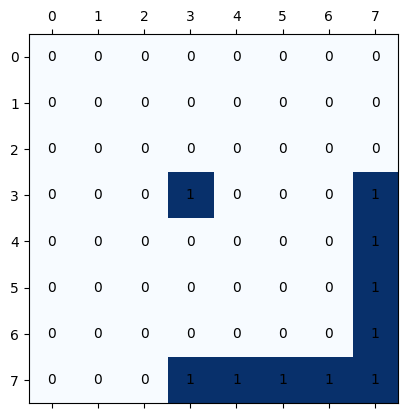

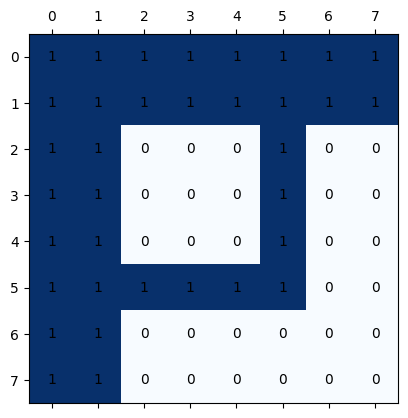

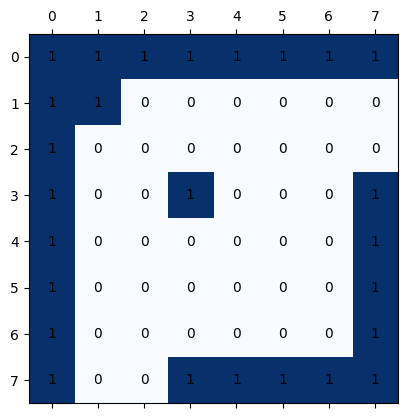

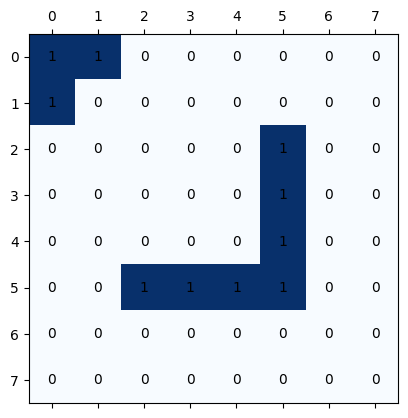

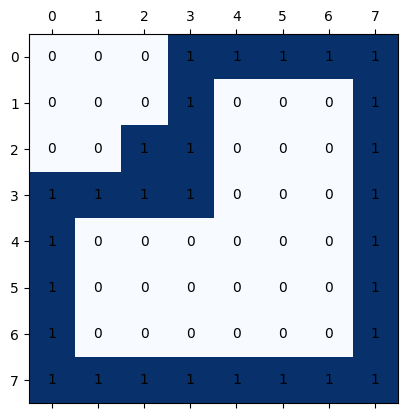

In [5]:

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

min_val, max_val = 0, 1


for generation in generational_matrix:
    fig, ax = plt.subplots()
    intersection_matrix = generation

    ax.matshow(intersection_matrix, cmap=plt.cm.Blues)

    for i in range(config["dimensions"][0]):
        for j in range(config["dimensions"][1]):
            c = intersection_matrix[j,i]
            ax.text(i, j, str(c), va='center', ha='center')